In [5]:
import numpy as np
from sklearn.svm import SVC
# fun fact, libSVC mentioned in the project write-up is encapsulated inside this SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.io import loadmat

In [3]:
# Load dataset
train_data = loadmat('train_32x32.mat')
test_data = loadmat('test_32x32.mat')

# Get first 5000 train data
num_samples = 5000
X_train = train_data['X'][:, :, :, :num_samples]  # (32, 32, 3, num_samples)
y_train = train_data['y'][:num_samples].flatten()

X_test = test_data['X'][:, :, :, :1000]  # Get first 1000 test data
y_test = test_data['y'][:1000].flatten()

# '0' has label 10
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# Transpose data to follow standard format,  (num_samples, 32, 32, 3)
X_train = np.transpose(X_train, (3, 0, 1, 2))
X_test = np.transpose(X_test, (3, 0, 1, 2))

# Greyscale
X_train_gray = np.mean(X_train, axis=3)  
X_test_gray = np.mean(X_test, axis=3)

# Flatten to 1D
X_train_flat = X_train_gray.reshape(num_samples, -1)
X_test_flat = X_test_gray.reshape(1000, -1)

# Train with different C-values
C_values = np.logspace(-3, 3, 10) # with 10 different C values
train_errors_cval = []
test_errors_cval = []

for C in C_values:
    print(f"Training with C value:{C}...")
    svm_clf = SVC(kernel='rbf', C=C, gamma='scale')
    svm_clf.fit(X_train_flat, y_train)

    train_acc_cval = accuracy_score(y_train, svm_clf.predict(X_train_flat))
    test_acc_cval = accuracy_score(y_test, svm_clf.predict(X_test_flat))

    train_errors_cval.append(1 - train_acc_cval)  # Train error
    test_errors_cval.append(1 - test_acc_cval)  # Test error



Training with C value:0.001...
Training with C value:0.004641588833612777...
Training with C value:0.021544346900318832...
Training with C value:0.1...
Training with C value:0.46415888336127775...
Training with C value:2.154434690031882...
Training with C value:10.0...
Training with C value:46.41588833612773...
Training with C value:215.44346900318823...
Training with C value:1000.0...


NameError: name 'plt' is not defined

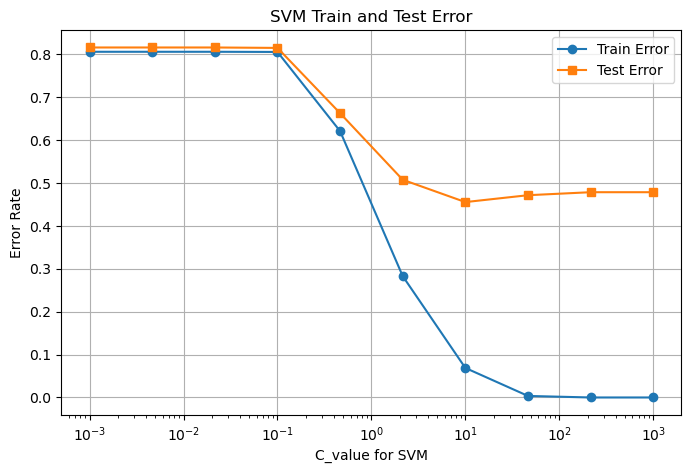

In [11]:
# Draw error graph
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_errors_cval, label='Train Error', marker='o', linestyle='-')
plt.plot(C_values, test_errors_cval, label='Test Error', marker='s', linestyle='-')
plt.xscale('log')
plt.xlabel('C_value for SVM')
plt.ylabel('Error Rate')
plt.title('SVM Train and Test Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Train with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
train_errors_kernels = []
test_errors_kernels = []

for kernel in kernels:
    print(f"Training SVM with kernel = {kernel}...")

    svm_clf = SVC(kernel=kernel, C=1, gamma='scale')
    svm_clf.fit(X_train_flat, y_train)

    train_acc = accuracy_score(y_train, svm_clf.predict(X_train_flat))
    test_acc = accuracy_score(y_test, svm_clf.predict(X_test_flat))

    train_errors_kernels.append(1 - train_acc)
    test_errors_kernels.append(1 - test_acc)


Training SVM with kernel = linear...


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(kernels, train_errors_kernels, label="Train Error", marker="o", linestyle="-")
plt.plot(kernels, test_errors_kernels, label="Test Error", marker="s", linestyle="-")
plt.xlabel("Kernel Type")
plt.ylabel("Error Rate")
plt.title("SVM Train and Test Error for Different Kernels")
plt.legend()
plt.grid(True)
plt.show()